# Big Data Wrangling With Google Books Ngrams -Jupyter Notebook
Benedikt Middelstaedt - 21/06/2024 - BrainStation Data Science & AI Bootcamp

## Table of content

1. Introduction
2. Loading from S3 bucket into Pandas 
3. Creating a plot 




## 1. Introduction

We have successfully processed the Google Ngrams data set in our EMR. In doing so, we filtered a specific subset of the data set. This filtered data set is now in an Amazon S3 bucket. 

## 2. Loading from S3 bucket into Pandas 

In [ ]:
!pip install s3fs

import pandas as pd 

Retrieve the filtered data from the S3 bucket.

In [45]:
filtered_data = pd.read_csv('s3://benediktmiddy-big-data-bucket/filter.csv')

This is only possible if the AWS credentials are available.

## 3. Creating a Plot

In [54]:
#get an overview
filtered_data

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1
...,...,...,...,...,...
311,data,2004,201841,93539,3483
312,data,2005,197467,88901,3392
313,data,2006,203669,92960,3449
314,data,2007,168338,78986,3246


In [47]:
filtered_data.drop(index=0, inplace =True)
filtered_data.reset_index(inplace=True)
filtered_data.drop(columns='index', inplace=True)

In [50]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    object
 2   frequency  316 non-null    int32 
 3   pages      316 non-null    object
 4   books      316 non-null    object
dtypes: int32(1), object(4)
memory usage: 11.2+ KB


In [55]:
filtered_data['frequency'] = filtered_data['frequency'].astype(int)


# normal aproach, but the date 1584 is out of daterange in Pandas and year as a int do the trick in this case
# filtered_data['year'] = pd.to_datetime(filtered_data['year'], errors = 'coerce')


filtered_data['year'] = filtered_data['year'].astype(int)

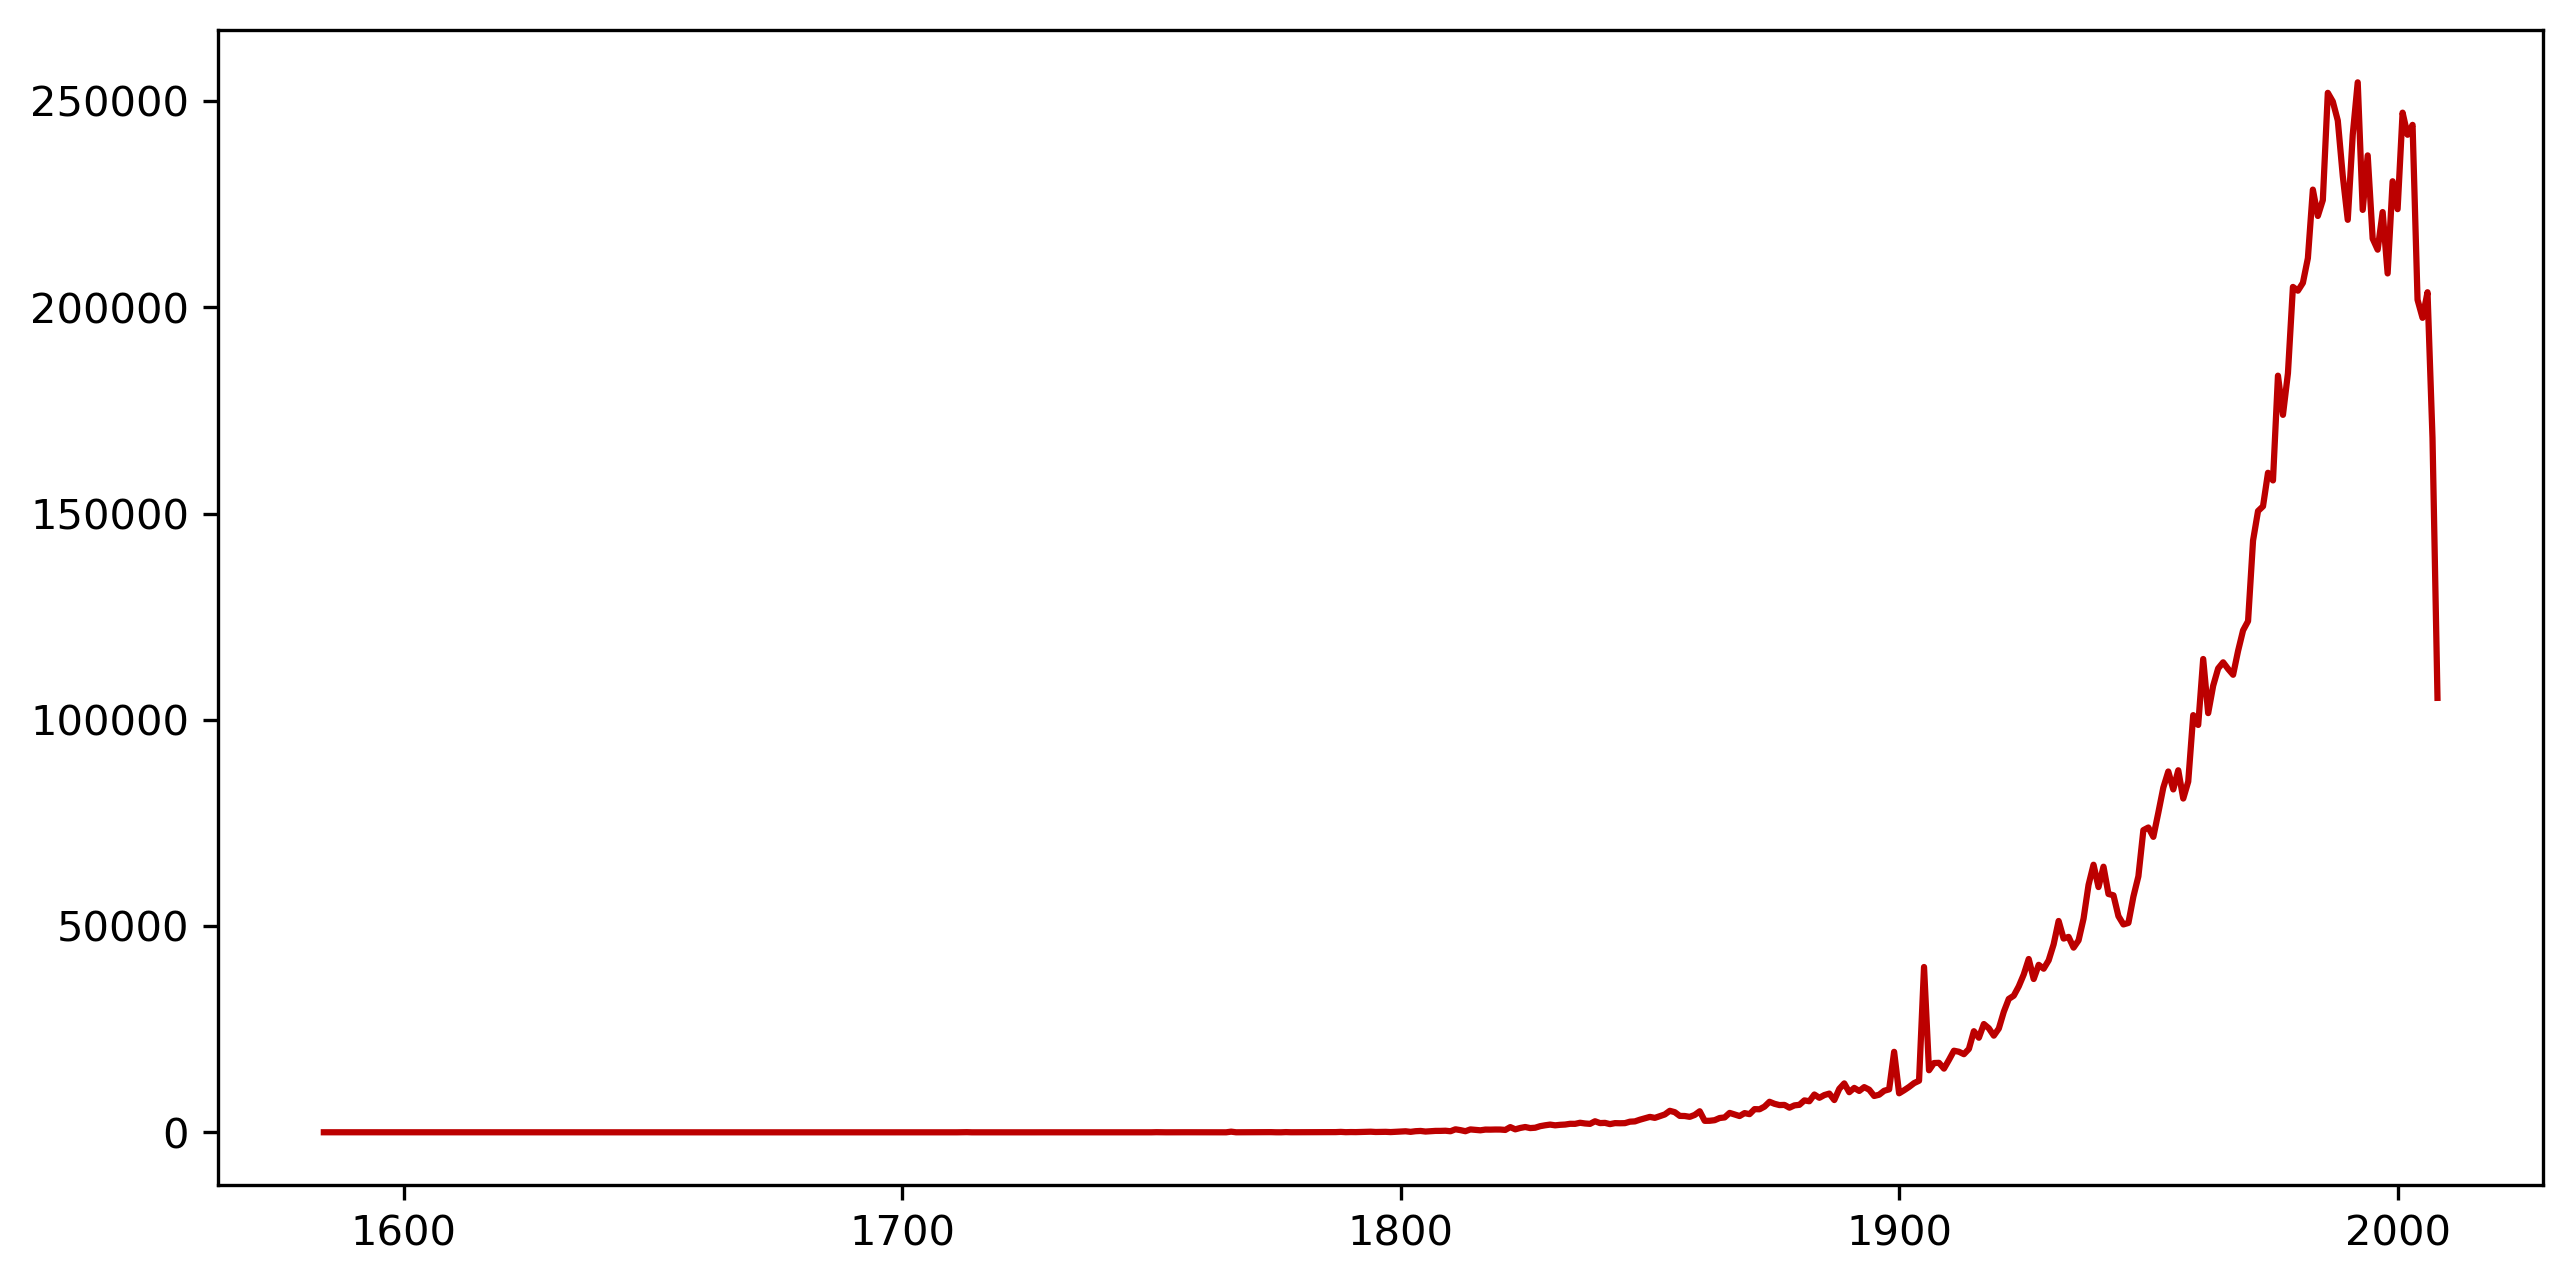

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5), dpi= 300)
plt.plot(filtered_data['year'], filtered_data['frequency'], color = '#bc0000' )
plt.show()